In [1]:
import requests
import pandas as pd


In [2]:
#Got Open Weather API and key to use with the URL. Download and made request
#pull out the data that will be used such as temperature in imperial. The 
#original temperature came in standard and was converted to imperial units.
#Using for loops, temperature was gathered and the data were appended.
temps = []

url = "http://api.openweathermap.org/data/2.5/forecast?zip=20850,us&units=imperial&appid=d7bb4169bffbbdccbe072168d0db38e7" 
page = requests.get(url)
weather_data = page.json()
a = weather_data['list']
for i in range(0, weather_data['cnt']):
    b = a[i]
    c = b['main']
    d = c['temp']

    temps.append(d)

In [3]:
#Continued getting information using the for lopps and appending information 
#on the date and time

dt_txts = []

for i in range(0, weather_data['cnt']):
    b = a[i]  
    f = b['dt_txt']
    dt_txts.append(f)


In [4]:
#For loops was used to gather the description and
#was appended to descriptions.
descriptions = []

for i in range(0, weather_data['cnt']):
    b = a[i]
    
    h = b['weather'][0]      
    description = h['description']
    descriptions.append(description)


In [5]:
#Created weather_data2 a pandas data frame containing date, temperature 
#and description.
weather_data2 = pd.DataFrame({'Date':dt_txts, "Temperature": temps, 
                              "Description": descriptions})
weather_data2

,Date,Temperature,Description
0,2020-10-07 03:00:00,59.68,clear sky
1,2020-10-07 06:00:00,57.36,clear sky
2,2020-10-07 09:00:00,56.21,clear sky
3,2020-10-07 12:00:00,56.53,clear sky
4,2020-10-07 15:00:00,68.25,clear sky
5,2020-10-07 18:00:00,78.46,clear sky
6,2020-10-07 21:00:00,78.15,clear sky
7,2020-10-08 00:00:00,69.69,clear sky
8,2020-10-08 03:00:00,63.66,clear sky
9,2020-10-08 06:00:00,56.91,clear sky


In [6]:
#Information about the weather_data2 needed to be gathered to know the data
#type. Date and Time are objects that needed to be separated
print(weather_data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         40 non-null     object 
 1   Temperature  40 non-null     float64
 2   Description  40 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.1+ KB
None


In [7]:
weather_data2["Date"] = pd.to_datetime(weather_data2['Date'])
weather_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         40 non-null     datetime64[ns]
 1   Temperature  40 non-null     float64       
 2   Description  40 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.1+ KB


In [8]:
#After converting the Date and Time to data type datetime. Date and Time 
#is separated from one another.
weather_data2["Time"]=weather_data2["Date"].dt.time


In [9]:
weather_data2['Date']=weather_data2['Date'].dt.date

In [10]:
weather_data2

,Date,Temperature,Description,Time
0,2020-10-07,59.68,clear sky,03:00:00
1,2020-10-07,57.36,clear sky,06:00:00
2,2020-10-07,56.21,clear sky,09:00:00
3,2020-10-07,56.53,clear sky,12:00:00
4,2020-10-07,68.25,clear sky,15:00:00
5,2020-10-07,78.46,clear sky,18:00:00
6,2020-10-07,78.15,clear sky,21:00:00
7,2020-10-08,69.69,clear sky,00:00:00
8,2020-10-08,63.66,clear sky,03:00:00
9,2020-10-08,56.91,clear sky,06:00:00


In [11]:
#This descibes the temperature during the 5 day period whereby temperature
#was gathered every 3 hours. It is gathered that there are 40 index, the 
#average temperature is 59.684250 while the spread of dispersion is 7.309277.

weather_data2['Temperature'].describe()

count    40.00000
mean     62.31600
std       6.96761
min      51.28000
25%      57.34750
50%      61.28500
75%      67.00500
max      78.46000
Name: Temperature, dtype: float64

In [12]:
#The temperature was sorted from coldest to warmest
sorted_weather_data2 = weather_data2.sort_values(by='Temperature')
sorted_weather_data2


,Date,Temperature,Description,Time
11,2020-10-08,51.28,clear sky,12:00:00
18,2020-10-09,51.49,clear sky,09:00:00
19,2020-10-09,52.16,clear sky,12:00:00
10,2020-10-08,52.84,clear sky,09:00:00
17,2020-10-09,52.99,clear sky,06:00:00
16,2020-10-09,54.82,clear sky,03:00:00
2,2020-10-07,56.21,clear sky,09:00:00
3,2020-10-07,56.53,clear sky,12:00:00
9,2020-10-08,56.91,clear sky,06:00:00
38,2020-10-11,57.31,light rain,21:00:00


In [13]:
#These are the coldest temperature for the week
sorted_weather_data2.head()

,Date,Temperature,Description,Time
11,2020-10-08,51.28,clear sky,12:00:00
18,2020-10-09,51.49,clear sky,09:00:00
19,2020-10-09,52.16,clear sky,12:00:00
10,2020-10-08,52.84,clear sky,09:00:00
17,2020-10-09,52.99,clear sky,06:00:00


In [14]:
#These are the warmest temperature for the week
sorted_weather_data2.tail()

,Date,Temperature,Description,Time
7,2020-10-08,69.69,clear sky,00:00:00
29,2020-10-10,73.31,overcast clouds,18:00:00
30,2020-10-10,74.08,overcast clouds,21:00:00
6,2020-10-07,78.15,clear sky,21:00:00
5,2020-10-07,78.46,clear sky,18:00:00


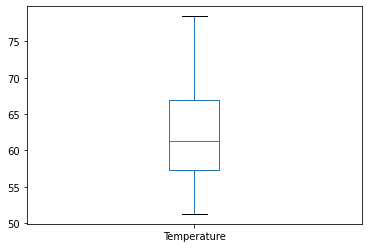

In [17]:
#Using matplotlib, a box plot was made. The temperature is stable. Since
#there are no outliers. The smallest data value is within the lower fence
#while the largest data value stayed within the upper fence. This box plot
#is slightly right skewed.
import matplotlib
weather_data2.Temperature.plot(kind = 'box')

In [19]:
#The temperature was stored in a csv filed called weather every 3 hours
weather_data2.to_csv('data.csv', encoding='utf-8', index=False)